# Naive Bayes
### Modelo 10
- CountVectorizer
- Base B


#### Imports necessarios para funcionamento da aplicacao

In [1]:
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score
from nltk import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

#### Leitura do arquivo de dados

In [2]:
df = pd.read_csv('../../base_b.csv')

df.head()

,nome,categoria
0,BRAHMA,BRAHMA
1,BRAHMA 550ML,BRAHMA
2,BRAHMA CERV 350ML LT,BRAHMA
3,BRAHMA CERVEJA 350ML,BRAHMA
4,BRAHMA CERVEJA 350ML LT,BRAHMA


#### Efetua o tratamento dos dados

In [3]:
le = LabelEncoder()

df.categoria = le.fit_transform(df.categoria)

df.head()

,nome,categoria
0,BRAHMA,0
1,BRAHMA 550ML,0
2,BRAHMA CERV 350ML LT,0
3,BRAHMA CERVEJA 350ML,0
4,BRAHMA CERVEJA 350ML LT,0


#### Função de tokenização

In [4]:
stemmer = RSLPStemmer()

def token(text):
    text = re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', text)
    txt = word_tokenize(text.lower())
    return [stemmer.stem(word) for word in txt]

#### Separa base de treino e teste

In [5]:
X_train,X_test,y_train,y_test = train_test_split(
    df.nome,
    df.categoria,
    test_size = 0.3,
    random_state = 42
)

#### Define CountVectorizer

In [6]:
count_vectorizer = CountVectorizer(
    tokenizer=token,
    ngram_range=(1,2)
)

#### Cria vocabulário

In [7]:
X_train = count_vectorizer.fit_transform(X_train.values)

## Etapa de treinamento
#### Cria um classificador Naive Bayes

In [8]:
model = GaussianNB()

#### Treina o classificador

In [9]:
model.fit(X_train.toarray(), y_train)

GaussianNB()

## Etapa de Teste

#### Efetua a predição

In [10]:
Y_Pred = model.predict(count_vectorizer.transform(X_test).toarray())

#### Calcula a acurácia do classificador

In [11]:
print('acuracia: {:.1f}'.format(accuracy_score(y_test, Y_Pred) * 100))
print('precisao: {:.1f}'.format(precision_score(y_test, Y_Pred, average="weighted") * 100))

acuracia: 90.4
precisao: 92.3


#### Tabela com os itens classificados errados na base de teste

In [12]:
d = []

for i in range(len(X_test)):
    au = count_vectorizer.transform([X_test.values[i]])
    pred = model.predict(au.toarray())
    if (y_test.values[i] != pred[0]):
        d.append(
            [
                X_test.values[i],
                le.inverse_transform([y_test.values[i]])[0],
                le.inverse_transform(pred)[0]
            ]
        )

df_error = pd.DataFrame(data=d,columns=['Nome','Categoria Original','Pred'])
df_error

,Nome,Categoria Original,Pred
0,SUCO DE UVA SPRES 2LT,SUCO UVA,SUCO UVA INTEGRAL
1,FANTA P PR CP,FANTA,COCA-COLA
2,SUCO DAFRUTA LARANJA P,SUCO LARANJA,SUCO LARANJA INTEGRAL
3,GUARANA FANTA,FANTA,GUARANA ANTARTICA
4,SUCO DEL VALLE FRESH LARANJA 400ML,SUCO LARANJA,SUCO LARANJA INTEGRAL
...,...,...,...
81,SUCO SERRA DA UVA 1L,SUCO UVA,SUCO UVA INTEGRAL
82,SUCO LARANJA 300 ML,SUCO LARANJA,SUCO LARANJA INTEGRAL
83,REF DES.CINI WINI 2L GUARANA,CINI REFRIGERANTE,KUAT
84,REFRIG COCA COLA ZER,COCA-COLA,COCA-COLA ZERO


#### Gráfico

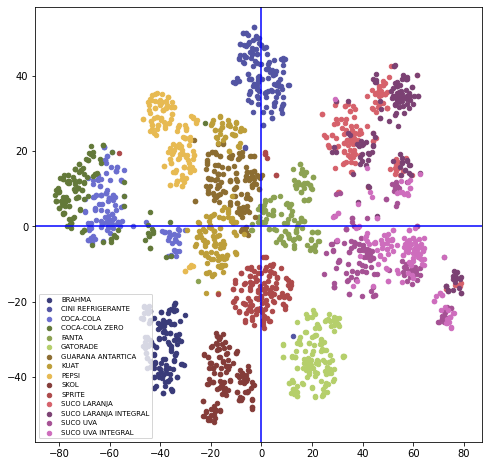

In [13]:
modelTSNE = TSNE(n_components=2, init='pca', random_state=0)
transformed = modelTSNE.fit_transform(X_train.todense())

fig, ax = plt.subplots(figsize=(8,8))

for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(transformed[:,0][ix], transformed[:,1][ix], c=[plt.cm.tab20b(float(g)/15)], s=20, label = le.inverse_transform([g])[0])

plt.legend(loc='lower left',fontsize=7)
plt.axhline(color='b')
plt.axvline(color='b')
plt.show()

#### Matriz de Confusão

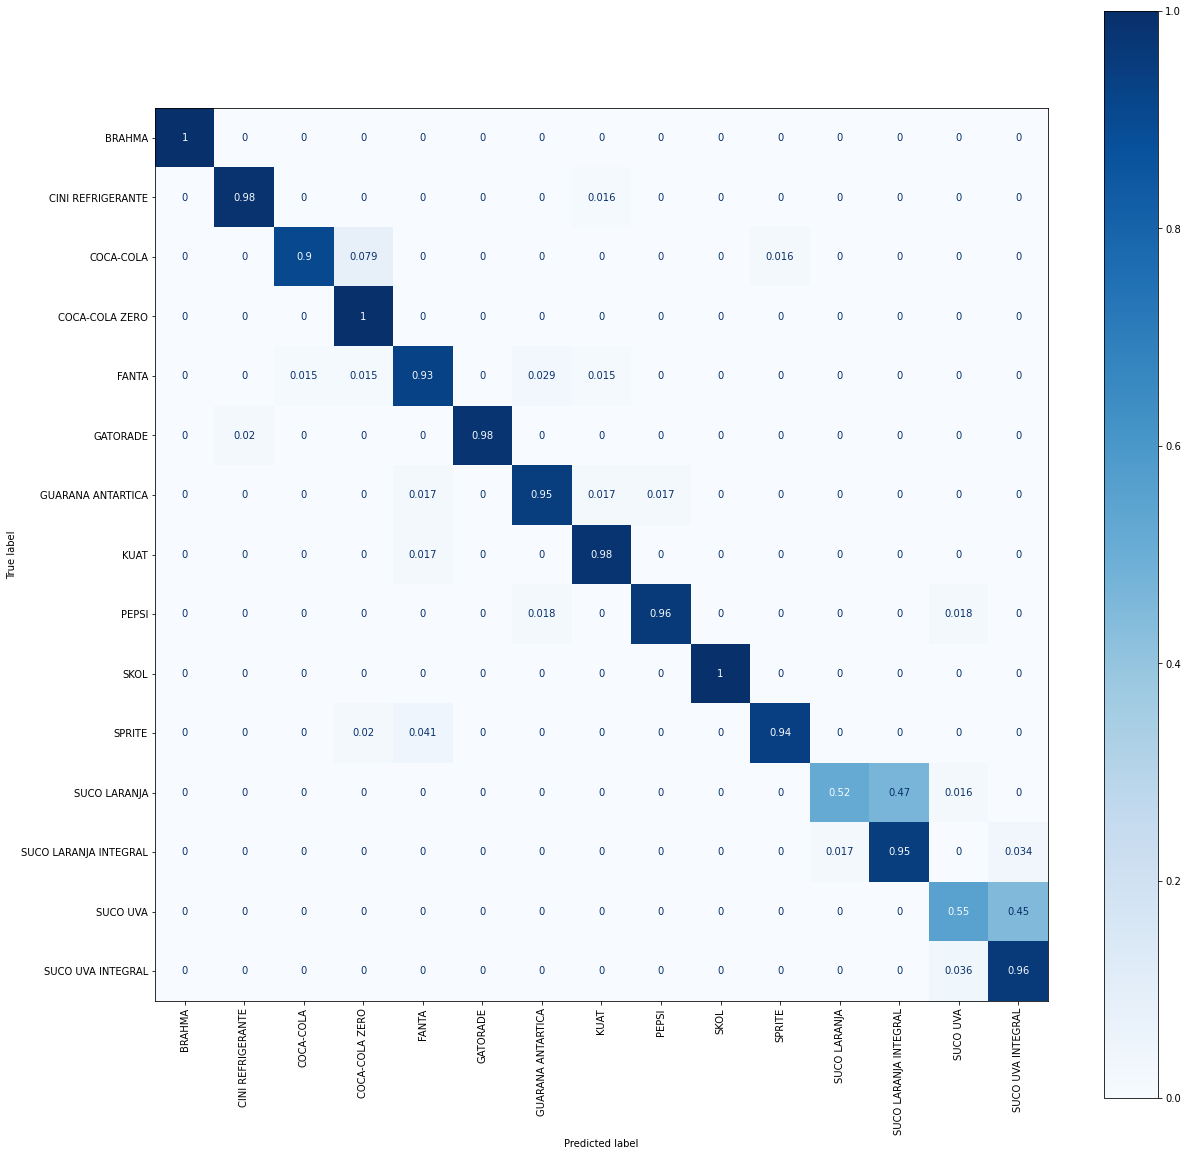

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(
    model,
    count_vectorizer.transform(X_test).toarray(),
    y_test,
    display_labels=np.unique(le.inverse_transform(y_test)),
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax,
    xticks_rotation='vertical'
)